Python for NLP: Multi-label Text Classification with Keras

Multi-label Text Classification Model with Multiple Output Layer

https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/ (english)

https://maelfabien.github.io/machinelearning/NLPfr/#7-embedding-par-mot (french - spacy)

Import data and libraries

In [23]:
import pandas as pd

#'Unnamed: 0' 'lemmes' 'pos'
X_train = pd.read_csv("../challenge_dataset/X_train_clean.csv").drop(columns='Unnamed: 0')

#'Id', 'category_1', 'category_2', 'category_3', 'category_4'
Y_train = pd.read_csv("../challenge_dataset/y_train.csv",sep=";").drop(columns="Id")

#'Id ', 'Caption'
X_test_to_predict = pd.read_csv("../challenge_dataset/X_test.csv",sep=';').drop(columns='Id ')

#'Id ', 'Caption'
#X_test = pd.read_csv("../challenge_dataset/X_test.csv",sep=';').drop(columns='Id ')

In [24]:
#X_test.columns
#Y_train.columns

Necessary imports

In [25]:
#pip install tensorflow

from numpy import array
from keras.preprocessing.text import one_hot
from keras.utils.data_utils import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate

import numpy as np
import re

import matplotlib.pyplot as plt

Shape and header

In [26]:
#print(X_train.shape)

#X_train.head()

Repartition of categories among training dataset

<AxesSubplot: >

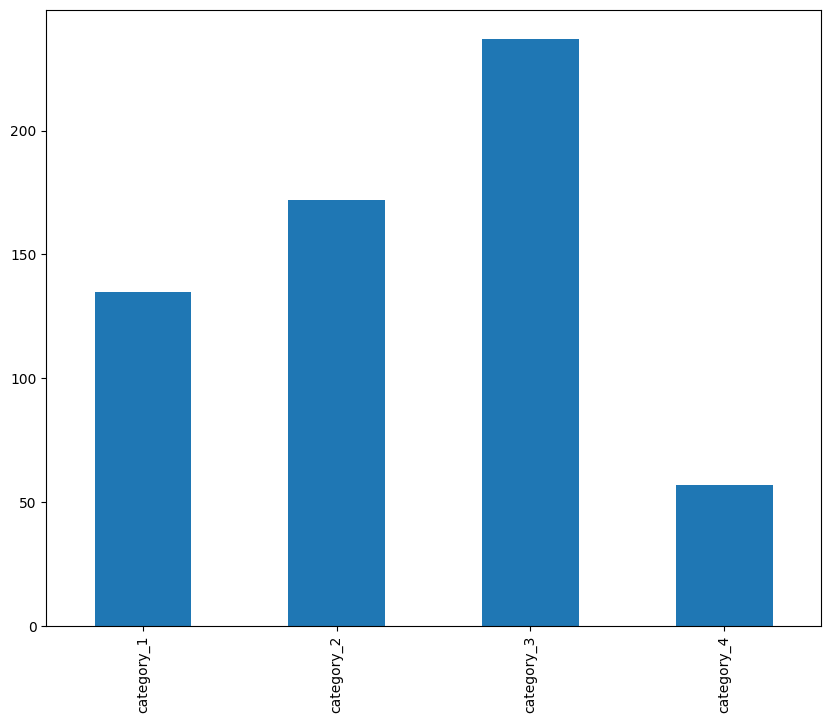

In [27]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Y_train.sum(axis=0).plot.bar()

Creating Multi-label Text Classification Models

Multi-label Text Classification Model with Multiple Output Layer

Pre-processing text

In [28]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Zéèàùï]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [29]:
X_train_cleaned = []

for sentences in X_train['lemmes']:
    X_train_cleaned.append(preprocess_text(sentences))

X_test_to_predict_cleaned = []
for sentences in X_test_to_predict['Caption']:
    X_test_to_predict_cleaned.append(preprocess_text(sentences))

X_train_cleaned = pd.DataFrame(X_train_cleaned, columns=['values'])
X_test_to_predict_cleaned = pd.DataFrame(X_test_to_predict_cleaned, columns=['values'])

print(X_train_cleaned)

#print(X_train_cleaned)

                                                values
0               mourir heure plus revoir petit enfant 
1     maladie conséquence jeune génération voir sit...
2                                    sortir mal loger 
3     inquiétude santé proche plus fragile femme ba...
4                    bien entendre contracter maladie 
..                                                 ...
480                                 forme grave civid 
481   inquiétude retrouver liberté action total lim...
482   incertitude lequel plus voir petit fils jusqu...
483   inquiétude normal face épidémie crainte voir ...
484                                respecter barrière 

[485 rows x 1 columns]


Training 80% testing 20%

In [30]:
import tensorflow as tf

In [31]:
X = X_train_cleaned['values']
Y = Y_train

X_test_to_predict_full = X_test_to_predict_cleaned['values']

X_train_full=X
Y_train_full=Y

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#X_train = tf.convert_to_tensor(X_train, dtype=object)
#X_test = tf.convert_to_tensor(X_test, dtype=object)
#y_train = tf.convert_to_tensor(y_train, dtype=object)
#y_test = tf.convert_to_tensor(y_test, dtype=object)

In [32]:
#'category_1', 'category_2', 'category_3', 'category_4'

# First output
y1_train = y_train[['category_1']].values
y1_train_full = Y_train_full[['category_1']].values
y1_test =  y_test[['category_1']].values

# Second output
y2_train = y_train[['category_2']].values
y2_train_full = Y_train_full[['category_2']].values
y2_test =  y_test[['category_2']].values

# Third output
y3_train = y_train[['category_3']].values
y3_train_full = Y_train_full[['category_3']].values
y3_test =  y_test[['category_3']].values

# Fourth output
y4_train = y_train[['category_4']].values
y4_train_full = Y_train_full[['category_4']].values
y4_test =  y_test[['category_4']].values

Word embedding

In [33]:
#launch once or relaunch previous cell

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_train_full = tokenizer.texts_to_sequences(X_train_full)
X_test = tokenizer.texts_to_sequences(X_test)
X_test_to_predict_full = tokenizer.texts_to_sequences(X_test_to_predict_full)

#print(X_train_cleaned)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_train_full = pad_sequences(X_train_full, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_test_to_predict_full = pad_sequences(X_test_to_predict_full, padding='post', maxlen=maxlen)

#print(X_train_cleaned)

Word embedding (french)

https://www.cs.cmu.edu/~afm/projects/multilingual_embeddings.html

In [34]:
from numpy import array, asarray, zeros

In [35]:
embeddings_dictionary = dict()

glove_file = open('../resources/multilingual_embeddings.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 300))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [36]:
#print(embedding_matrix)

NN model

Summary of the NN

Architecture of the NN

Train model

Evaluate model

Graphs of the model

Predictions

Model on all train data

In [37]:
input_1_full = Input(shape=(maxlen,))
embedding_layer_full = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(input_1_full)
LSTM_Layer1_full = LSTM(32)(embedding_layer_full)

output1_full = Dense(1, activation='sigmoid')(LSTM_Layer1_full)
output2_full = Dense(1, activation='sigmoid')(LSTM_Layer1_full)
output3_full = Dense(1, activation='sigmoid')(LSTM_Layer1_full)
output4_full = Dense(1, activation='sigmoid')(LSTM_Layer1_full)

model_full = Model(inputs=input_1_full, outputs=[output1_full, output2_full, output3_full, output4_full])
model_full.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [38]:
print(model_full.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 200, 300)     462000      ['input_2[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (None, 32)           42624       ['embedding_1[0][0]']            
                                                                                                  
 dense_4 (Dense)                (None, 1)            33          ['lstm_1[0][0]']                 
                                                                                            

In [39]:
from keras.utils import plot_model

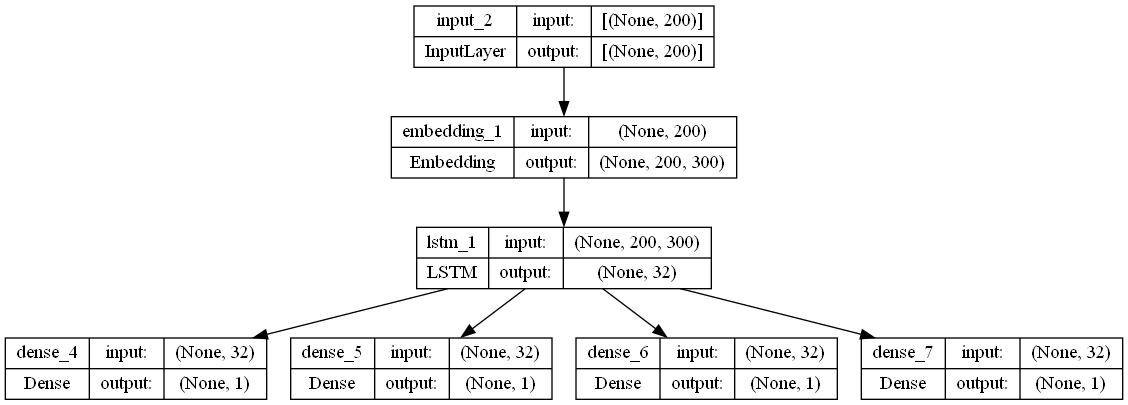

In [40]:
plot_model(model_full, to_file='model_full_plot4a.png', show_shapes=True, show_layer_names=True)

In [41]:
#print(y1_train_full)

history_full = model_full.fit(x=X_train_full, y=[y1_train_full, y2_train_full, y3_train_full, y4_train_full], batch_size=128, epochs=10, verbose=1, validation_split=0)

Epoch 1/10
4/4 [==============================] - 5s 145ms/step - loss: 2.7672 - dense_4_loss: 0.6912 - dense_5_loss: 0.6928 - dense_6_loss: 0.6931 - dense_7_loss: 0.6901 - dense_4_acc: 0.7216 - dense_5_acc: 0.6454 - dense_6_acc: 0.5113 - dense_7_acc: 0.8825
Epoch 2/10
4/4 [==============================] - 1s 140ms/step - loss: 2.7506 - dense_4_loss: 0.6852 - dense_5_loss: 0.6915 - dense_6_loss: 0.6931 - dense_7_loss: 0.6808 - dense_4_acc: 0.7216 - dense_5_acc: 0.6454 - dense_6_acc: 0.5113 - dense_7_acc: 0.8825
Epoch 3/10
4/4 [==============================] - 1s 143ms/step - loss: 2.7288 - dense_4_loss: 0.6775 - dense_5_loss: 0.6901 - dense_6_loss: 0.6931 - dense_7_loss: 0.6682 - dense_4_acc: 0.7216 - dense_5_acc: 0.6454 - dense_6_acc: 0.5113 - dense_7_acc: 0.8825
Epoch 4/10
4/4 [==============================] - 1s 141ms/step - loss: 2.6995 - dense_4_loss: 0.6668 - dense_5_loss: 0.6879 - dense_6_loss: 0.6930 - dense_7_loss: 0.6518 - dense_4_acc: 0.7216 - dense_5_acc: 0.6454 - dense_

In [42]:
#'Id ', 'Caption'

#X_test_to_predict = pd.read_csv("../challenge_dataset/X_test.csv",sep=';').drop(columns='Id ')
#X_test_to_predict_values = X_test_to_predict['Caption'].values
#X_test_to_predict.columns

In [43]:
#X_test_to_predict_values

In [44]:
#Y_predicted_test = model_full.predict(x=X_test_to_predict, batch_size=32, verbose=1, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

#Y_predict_full = model_full.predict(X_test_to_predict_full, batch_size=32)

Y_predict_full = model_full.predict(X_test_to_predict_full, batch_size=32)

5/5 [==============================] - 1s 31ms/step


In [45]:
Y_predict_full[0]

array([[0.25994593],
       [0.259946  ],
       [0.259946  ],
       [0.259946  ],
       [0.25994593],
       [0.2599461 ],
       [0.259946  ],
       [0.25994593],
       [0.25994605],
       [0.259946  ],
       [0.25994593],
       [0.25994593],
       [0.25994593],
       [0.25994593],
       [0.25994593],
       [0.25994602],
       [0.259946  ],
       [0.259946  ],
       [0.25994605],
       [0.25994593],
       [0.25994593],
       [0.259946  ],
       [0.25994593],
       [0.259946  ],
       [0.25994593],
       [0.25994593],
       [0.2599461 ],
       [0.259946  ],
       [0.25994593],
       [0.25994593],
       [0.25994593],
       [0.25994617],
       [0.259946  ],
       [0.2599465 ],
       [0.25994593],
       [0.25994593],
       [0.25994593],
       [0.25994593],
       [0.25994593],
       [0.25994593],
       [0.25994593],
       [0.25994593],
       [0.25994608],
       [0.25994593],
       [0.259946  ],
       [0.259946  ],
       [0.25994602],
       [0.259